# Homework 4: SVM & Decision Trees

Follow the instructions in the template, score will be given uppon it.

## Import libraries
You are allowed to use these libraries only. Other libraries from sklearn are not allowed without permission! However, feel free to ask for permission from course staff.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import auc, roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve
from IPython.display import Image
import os
import time

# Utility functions
functions that may assist you during this exercise. feel free to use them where you find them neccessary.

In [34]:
def plot_svm_decision_boundary(clf,margins=False, ax=None) -> None:
    """
    Plots Decision boundries for trained svm classifier -> after calling this function use plt.show()
    clf: sklearn svm object after training (clf.fit())
    margins: boolean parameter to display the margins (False by default)
    """
    # plot the decision function  
    ax = ax or plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    if margins:
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k',levels=[-1,0,1], alpha=0.5,
                linestyles=['--', '-', '--'])
    else:
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                linestyles=['-'])
        
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k',levels=1, alpha=0.5,
                linestyles=['-'])
    
def load_housing_data() -> tuple([pd.DataFrame,pd.Series]):
    assert os.path.exists('data_part2.csv'), "data.csv file must be in the same folder as the notebook!"
    housing_prices = pd.read_csv('data_part2.csv')
    y = housing_prices.price > housing_prices.price.mean()
    X = housing_prices.drop(columns=['price', 'date', 'id'])
    return X, y

# Part 1: SVM

#### Reading data

In [35]:
df = pd.read_csv('data_part1.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

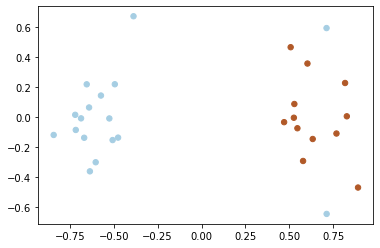

In [36]:
#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=29, cmap=plt.cm.Paired)
plt.show()

## a. Linear SVM
Use Linear SVM (SVM with linear kernel) and penalty C=1.  Plot the decision boundary and the margin. <br>
Answer the following question and explain your answer:<br>
How many support vectors do we get in this case?

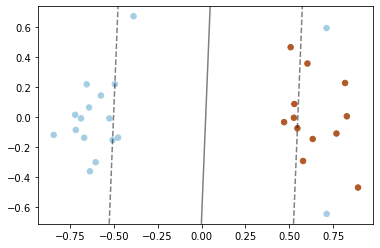

In [37]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
#for plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_svm_decision_boundary(clf,True)
plt.show()

Question: How many support vectors do we get in this case? <br>
Your Answer: 11. 3 on the actual margins (the "regular" SV) and also all the misfits - 8

## b. Penalty analysis for rbf kernel

Use SVM with RBF kernel. The slack penalty 𝐶 will determine the location of the separating hyperplane.<br>
    1. Where would the decision boundary be for very small values of 𝐶 (i.e.,𝐶 ≈ 0)? Plot the decision boundary. Justify your answer with words!<br>
    2. Where would the decision boundary be for very large values of 𝐶 (i.e., 𝐶 → ∞)? Plot the decision boundary. Justify your answer with words!<br>

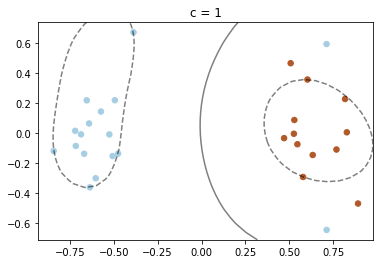

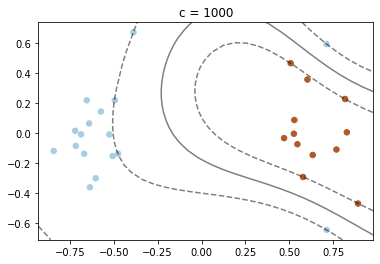

In [38]:
# Use this C list to answer questions above
Cs=[1,1000]
for c in Cs:
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X,y)
    #for plotting
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title(f'c = {c}')
    plot_svm_decision_boundary(clf,True)
    plt.show()

Answer with words below:

1. When C is very small, the classic support vectors (not the ones multiplied by c) are the much more significant. 
therfore the boundry is between the clusters

2. When C is very large. There is no Error tolerance. the model prefers to overfit in order to avoid any mistakes. That is why
we get this very curvy line.

## c. Choosing Gamma hyperparameter for rbf kernel

#### Creating data

In [39]:
# we generate 1000 samples with 2 features
X,y = datasets.make_circles(n_samples=1000, factor=.5, noise=.15, random_state=6)

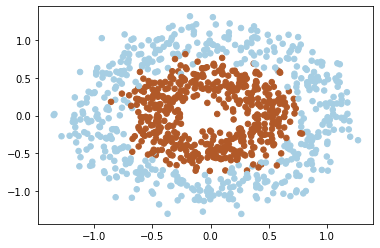

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

#### spliting data into train & Validation

In [41]:
X_train, X_Validation, y_train, y_Validation = train_test_split(X, y, test_size=0.25,random_state = 42,shuffle = True)

### Your mission:
For each Gamma value in Gs:
1. Run SVM with RBF kernel on the train data (with C=1)

2. Plot all the hyperplane & X values on the graph - train and validation. (Use the code from the recitation for the plot)

3. Use the validation data to calculate the Accuracy for each Gamma value. 

4. add a title that contains the gamma value and the accuracy in the following format:<br>
"Hyperplane with Gamma=1 and Acc=0.65" (the numbers are just for example).

In addition print: What is the optimal Gamma?

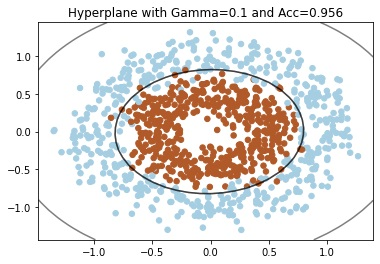

In [42]:
# Example plot
Image(filename='example_for_part1c.jpg') 

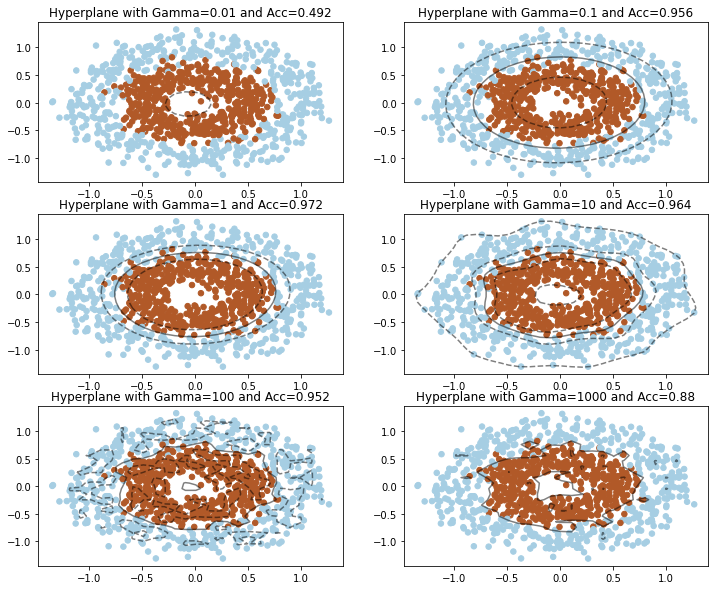

In [43]:
# Gamma possible values list
powers = range(-2,4)
Gs = [10**p for p in powers]
figure, axes = plt.subplots(3,2)
figure.set_size_inches((12,10))
axes = axes.reshape((6,))
scores_by_gamma = {}
G_score  =[]

for g, ax in zip(Gs, axes):
    model = svm.SVC(gamma=g)
    model.fit(X_train, y_train)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plot_svm_decision_boundary(model, True, ax)
    G_score.append(model.score(X_Validation,y_Validation))
    ax.set_title(f"Hyperplane with Gamma={g} and Acc={G_score[-1]}")    


In [44]:

Choosen_g = Gs[G_score.index(max(G_score))]
print("The optimal Gamma is: ", Choosen_g)

The optimal Gamma is:  1


# Part 2: Decision Trees

## a. Decision tree loss function: <br>
Consider the Gini index, classification error, and entropy in a simple binary classification setting. <br>
Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$ <br> which is the probability of class 1 in a tree node $m$ (if there is 1 `1` and 9 `0` then it is $\hat{p}_{m1}=0.1$). <br>
For `entropy`, use 0.5*entropy, instead of regular entropy formula. <br>
Hint: the output should look like the one from the lecture

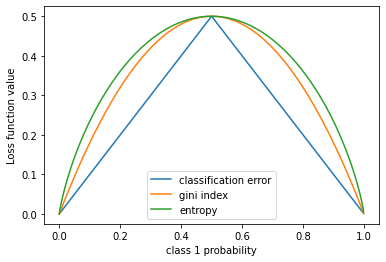

In [45]:
p = np.arange(0, 1, 0.001)  # probabilities

#TODO: get required values
# for classification, calssify by the maximum probability
classification_error = [1-max(a, 1-a) for a in p]

# unnormalized gini index
gini_index = [2*a*(1-a) for a in p]

# use only non zero values (p[1:]) to avoid an error for log(0)
# set the entropy for p=0 to 0
entropy = [0]+[-0.5*((1-a)*np.log2(1-a) + a*np.log2(a)) for a in p[1:]]

# plot
plt.plot(p, classification_error, label='classification error')
plt.plot(p, gini_index, label='gini index')
plt.plot(p, entropy, label='entropy')
plt.legend()
plt.xlabel('class 1 probability')
plt.ylabel('Loss function value')
plt.show()

## b. The Bias-Variance Tradeoff for RandomForest Regressor
Demonstrate the bias variance tradeoff using hyperparameter selection in a Random Forest Regressor, for the diabetes dataset.

### Instructions: 
- select one hyper-parameter to change that influences the bais variance tradeoff in Random Forest, while setting all other parameters constant as you wish. for more information about Random Forest parameters [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- **plot** train and validation mse according to your chosen parameter.
- explain why this demonstrates the bias variance tradeoff and how can we see it in your results.
- explain what do you think is the best value for this parameter in this experiment and why.
- max Runtime: 2 minutes
- use random_state=0 in the RandomForestRegressor constructor for reproducability.

In [46]:
diabetes_X_df, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X_dia_train, X_dia_val, y_dia_train, y_dia_val = train_test_split(diabetes_X_df, diabetes_y, test_size = 0.2, 
                                                      random_state = 42)

Runtime: 2.03 seconds


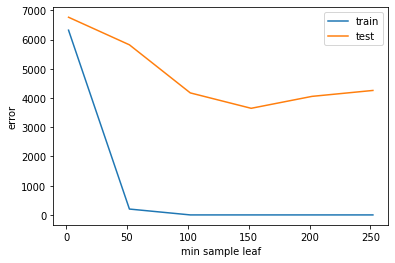

In [111]:
from sklearn.ensemble import RandomForestRegressor

t0 = time.time() # for Runtime measurement
max_leaf_nodes = list(range(2,300,50))
train_mses = []
val_mses = []
for n in max_leaf_nodes:
    model = RandomForestClassifier(n_estimators=30, random_state=0, max_leaf_nodes=n)
    model.fit(X_dia_train,y_dia_train)
    preds = model.predict(X_dia_train)
    train_mses.append(mean_squared_error(preds, y_dia_train))
    preds = model.predict(X_dia_val)
    val_mses.append(mean_squared_error(preds, y_dia_val))

plt.plot(max_leaf_nodes, train_mses, label='train')
plt.plot(max_leaf_nodes, val_mses, label='test')
plt.xlabel('min sample leaf')
plt.ylabel('error')
plt.legend()
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Question: why this demonstration explains the bias variance tradeoff and how can we see it in your results? <br>
your answer: 

we would expect to see train mse decreasing more and more, but test mse decreasing at first, but at some point start increasing
this is because from some point the model starts to overfit. 
this is exectly what we see in this grapgh

Question: what do you think is the best value for this parameter and why? <br>
your answer: 
it seems 150. it's the minimum point for test mse

## c. Using Random Forest Classifier

In [114]:
X_bos, y_bos = load_housing_data()
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size = 0.8, random_state = 42)
#Notice we take a small training set - this is only for exercise purposes so you can run the code in less than 10 minutes.

### c1. Finding hyperparameters 
Run Random Forest Classifier on the train data, by using K-fold cross-validation to tune and search for the best **hyper parameters** values with respect to AUC measure.<br>
- We suggest using `GridSearchCV` function. [Read documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

- You must get training AUC greater then 0.94 (You should limit the search to max 200 n_estimators).

- Maximun run time: 10 minutes.

- use random_state=0 in the RandomForestClassifier constructor for reproducability.

In [126]:
t0 = time.time() # for Runtime measurement
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(50)
search = GridSearchCV(model, scoring='roc_auc', param_grid=
{'min_samples_leaf':[1,3,5,9,15,20],
'max_leaf_nodes': tuple(range(2,300,50))
})
search.fit(X_bos_train, y_bos_train)
#TODO: Write your code here, define paramaters to search over and their values. Then find the best set of parameter values to train the model on. 
# Example: {param1: [10,20,30], param2: [2,4,7]}


print(f'Runtime: {round(time.time()-t0,2)} seconds')

Runtime: 55.64 seconds


In [127]:
#TODO: print requested values
best_model = search.best_estimator_
best_params = search.best_estimator_
best_score = search.best_score_
print(f'Best Params: {best_params} \n')
print(f'Train AUC score for best params: {best_score}')

Best Params: RandomForestClassifier(max_leaf_nodes=102, n_estimators=50) 

Train AUC score for best params: 0.9432596863997331


In [128]:
#TODO: Print test AUC
preds = search.best_estimator_.predict(X_bos_test)
test_auc = roc_auc_score(y_true=y_bos_test,y_score=preds)
print (f"test AUC: {test_auc}")

test AUC: 0.8550666666666666


### c2. Feature Importance
Plot a graph of the features importance for your chosen model. what are the TOP 5 important features? can you give intuition to why would they be indicative?

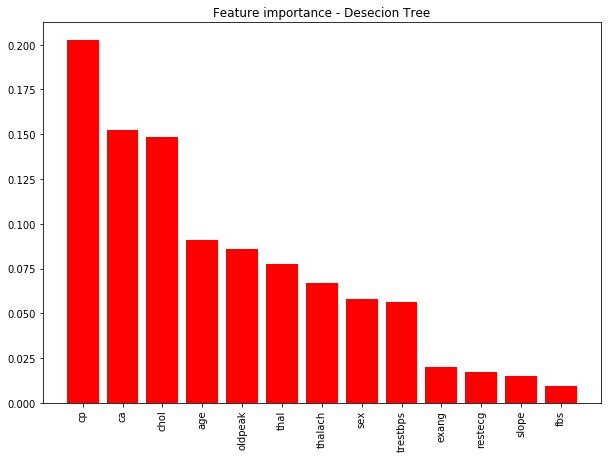

In [5]:
# Example plot
Image(filename='example_part2c.jpg') 

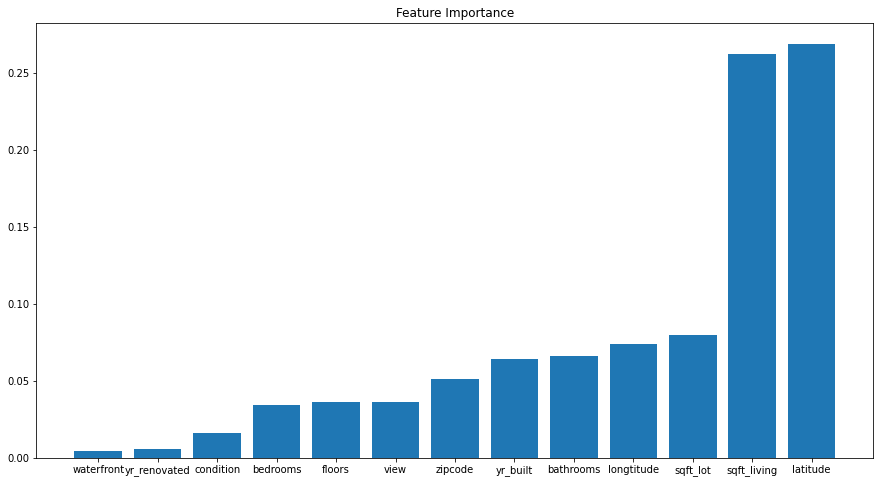

In [137]:
fet_imp = best_model.feature_importances_
sorted_idx = np.argsort(fet_imp)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(pos, fet_imp[sorted_idx], align='center')
plt.xticks(pos, np.array(X_bos.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

Question: what are the TOP 5 important features? can you give intuition to why would they be indicative? <br>
Answer:
1. latitude
2. sqft_living
3. sqft_lot
4. longtitude
5. bathrooms